---
title: Data Exploration
format:
  html:
    css: "styles.css"
    embed-resources: true
    code-fold: true
---

## EDA Goals:
The goals of this tab is to gain a deeper understanding of the data, how variables behave, and identify anomalies, paterns, or potential insights for future exploration.

## 


## EDA

Explratory Data Analysis (EDA) is a critical step in data science. The goal is to visualize the data and get different insights that can be used to guide the rest of the analysis. It will not only help you understand the data better, but also identify areas of study. Furthermore, visualizing the data allows you to understand its shape, identify outliers, and see potential relationships between variables.

By analyzing the data, I hope to answer some questions while also identifying new ones.

## Census Blocks Data

This data set contains the information about all the census blocks in the US. The data set contains 117 columns and 220740 rows. Each row is a census block. The information about what each variable means can be found inside EPA pdf inside the data folder. For the purpose of EDA, we will focus on the following variables: 'Ac_Water', 'Ac_Land', 'TotPop', 'AutoOwn0', 'E_MedWageWk'. These variables are the ones that I believe will be the most useful for the analysis.

The first main two focusses are Total Population and Working Class. These plots display relevant information about the distribution of these factors among all census blocks:

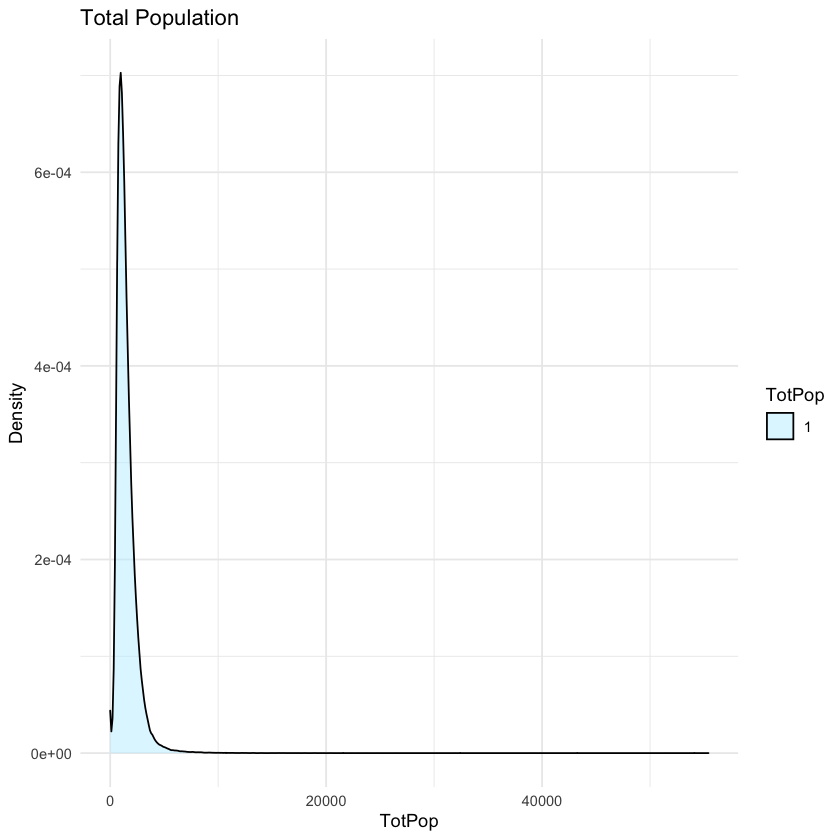

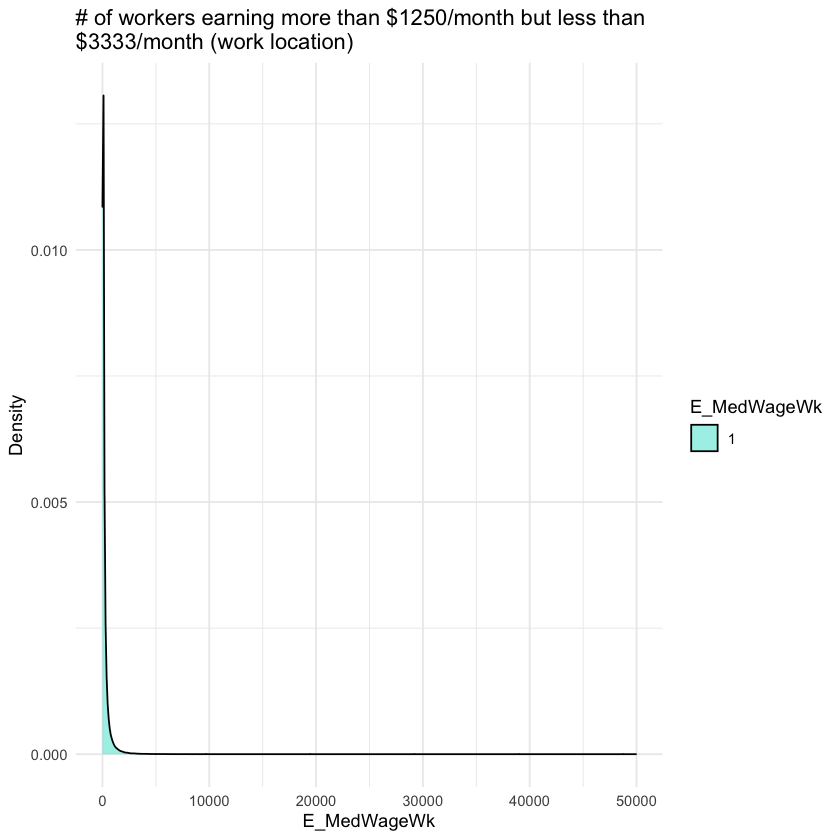

In [5]:
library(tidyverse)
library(ggplot2)
library(dplyr)

df <- read.csv("../../data/Clean_Data_project_Pub.Transport_5000/EPA_SmartLocationDatabase_V3_Jan_2021_Clean.csv")

columns_to_plot <- c('CBSA_POP', 'Ac_Water', 'Ac_Land', 'TotPop', 'P_WrkAge', 'E_HiWageWk', 'AutoOwn0', 'NatWalkInd', 'E_MedWageWk', 'Ac_Unpr')
df <- df[,columns_to_plot]

ggplot(df, aes(x = TotPop, fill = factor(1))) +
  geom_density(alpha = 0.5) +
  labs(title = "Total Population",
       x = "TotPop",
       y = "Density",
       fill = "TotPop") + 
  scale_fill_manual(values = c("lightblue1")) +
  theme_minimal()

ggplot(df, aes(x = E_MedWageWk, fill = factor(1))) +
  geom_density(alpha = 0.5) +
  labs(title = "# of workers earning more than $1250/month but less than
$3333/month (work location)",
       x = "E_MedWageWk",
       y = "Density",
       fill = "E_MedWageWk") + 
  scale_fill_manual(values = c("turquoise")) +
  theme_minimal()


As we can see, while some census blocks have really high values on these two parameters, most of them have low values. This is important to keep in mind when analyzing the data, as it will be important to understand how the data is distributed. The plots are impressingly skewed, which make sense as most of the US population is concentrated in small towns and cities.

The third point we will focus on is the number of people who own 0 cars. While the US is a car-centric country, since we are focussing on public transportation, this information could give us great insights, as these people will only be able to use public transportation or walk to get to their destination. The following plot shows the distribution of the number of people who own 0 cars:

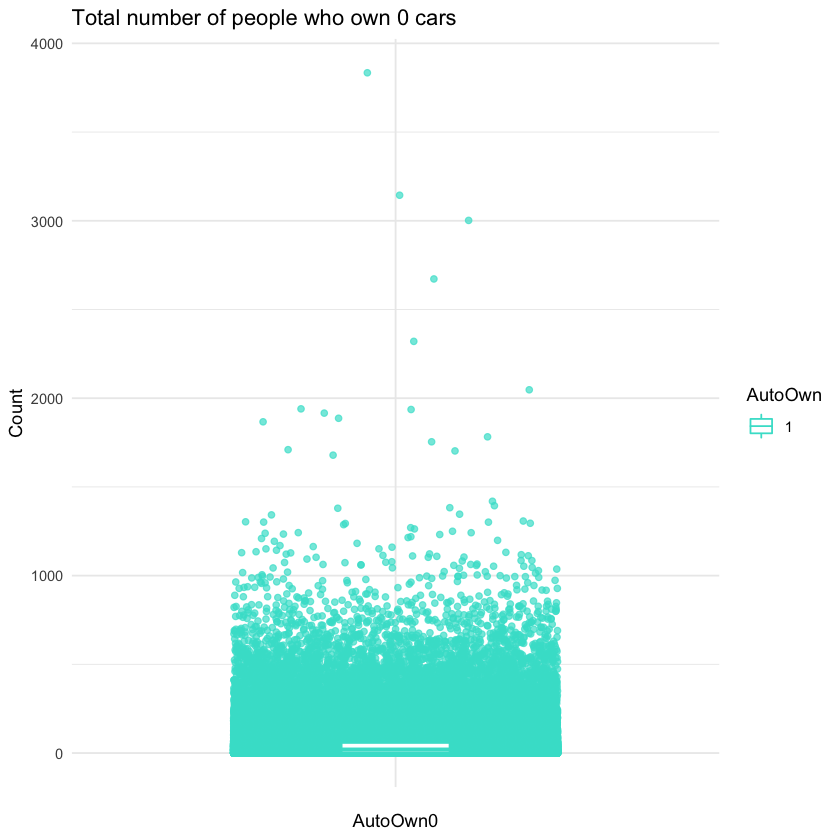

In [31]:
ggplot(df, aes(x = "", y = AutoOwn0, color = factor(1))) +
  geom_jitter(alpha = 0.7, width = 0.3) +
  geom_boxplot(width = 0.2, outlier.shape = NA, coef = 0) +
  labs(title = "Total number of people who own 0 cars",
       x = "AutoOwn0",
       y = "Count",
       fill = "AutoOwn0") +
  scale_color_manual(values = c("turquoise")) +
  theme_minimal() +
  guides(color = guide_legend(title = "AutoOwn"))


The boxplot is squezzed next to zero and each point represents a value for a census block. As expected, most of the US population owns at least one car. However, there is a significant amount of people who own 0 cars, which is great information for our analysis.

This following plot will aim to see how much water is on the census blocks. Since water determines not only what methods of transportation can be built but also exacerbates the costs of construction, it is a factor to keep in consideration. The following plot shows the distribution of the amount of water in the census blocks:

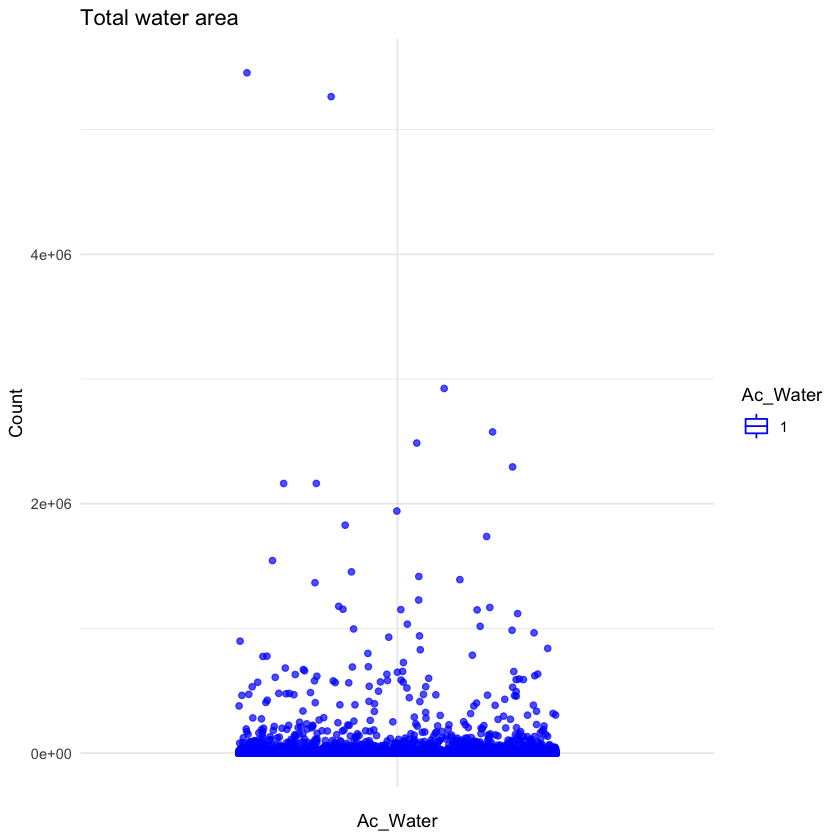

In [20]:
ggplot(df, aes(x = "", y = Ac_Water, color = factor(1))) +
  geom_jitter(alpha = 0.7, width = 0.3) +
  geom_boxplot(width = 0.2, outlier.shape = NA, coef = 0) +
  labs(title = "Total water area",
       x = "Ac_Water",
       y = "Count",
       fill = "Ac_Water") +
  scale_color_manual(values = c("blue")) +
  theme_minimal() +
  guides(color = guide_legend(title = "Ac_Water"))


This plot shows how most census blocks have a similar number of acres of water, however, the range is big enough to consider it in our analysis and cause problems with public transportation. Water is a determinant factor for public transportation, as it is not possible to build roads, railways on water, or makes constructing tunnels much harder. This is why it is important to understand how much water is in each census block. Furthermore, the fact that we have a couple of very big outliers will be very useful when drawing general conclusions about different groupings.

This last plot for this data set will focus on the amount of land in each census block. This is important as it will determine how much space is available for public transportation. The following plot shows the distribution of the amount of land in the census blocks:

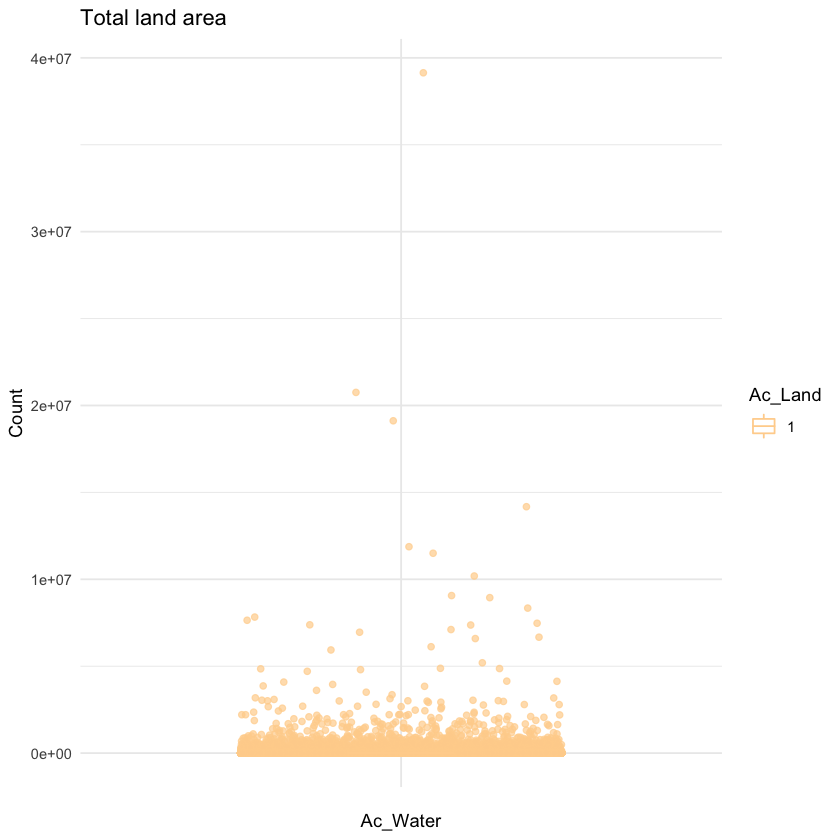

In [21]:
ggplot(df, aes(x = "", y = Ac_Land, color = factor(1))) +
  geom_jitter(alpha = 0.7, width = 0.3) +
  geom_boxplot(width = 0.2, outlier.shape = NA, coef = 0) +
  labs(title = "Total land area",
       x = "Ac_Water",
       y = "Count",
       fill = "Ac_Land") +
  scale_color_manual(values = c("burlywood1")) +
  theme_minimal() +
  guides(color = guide_legend(title = "Ac_Land"))

This plot shows how most census blocks have a similar number of acres of land, however, the range is big enough to consider it in our analysis and couse problems with public transportation. Land is a determinant factor for public transportation, as it determines the spread and the number of stops needed to cover these areas. We can see that there are a couple of very big outliers, which is important to take note of.

## 2021 Fuel and Energy Data

This data set contains information about public transportation, agencies, cities, and energy consumption. It was downloaded [here](https://www.transit.dot.gov/ntd/ntd-data).  We will aim to look for patterns in the data, outliers, counts, etc.

The following two plots focus on the average miles per gallon based on the population and the density of the Population of the urbanized area served by the transit agency. This will give us insights on the data we have about population and if there is a correlation between the population and the miles per gallon. 

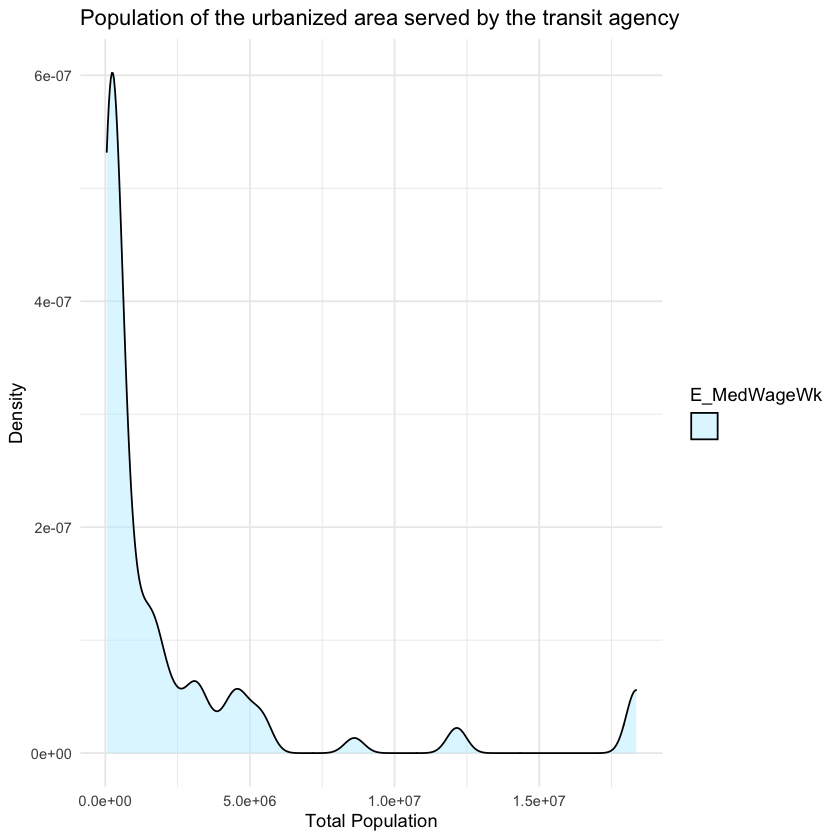

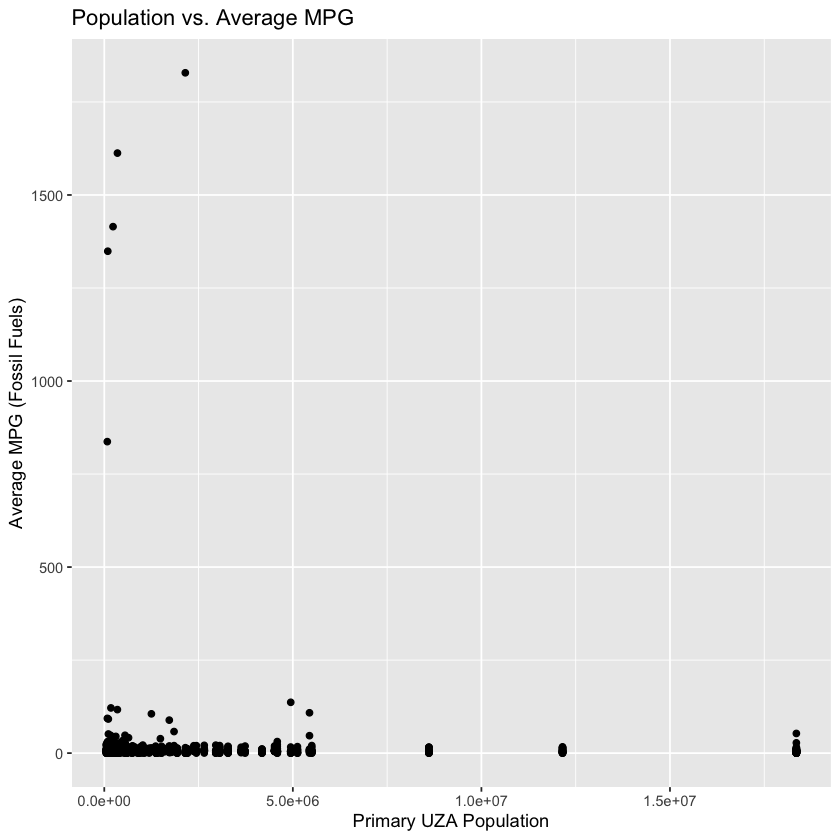

In [23]:
fuel <- read.csv("../../data/Clean_Data_project_Pub.Transport_5000/2021_Fuel_and_Energy_mpg_fossil_fuels.csv")

ggplot(fuel, aes(x = Primary.UZA.Population, fill = "")) +
  geom_density(alpha = 0.5) +
  labs(title = "Population of the urbanized area served by the transit agency",
       x = "Total Population",
       y = "Density",
       fill = "E_MedWageWk") +
  scale_fill_manual(values = c("lightblue1")) +
  theme_minimal()

ggplot(fuel, aes(x = Primary.UZA.Population, y = avg_mpg_fossil_fuels)) +
  geom_point() +
  labs(title = "Population vs. Average MPG",
       x = "Primary UZA Population",
       y = "Average MPG (Fossil Fuels)")

From these plots we can see that the population density is skewed to the left in our data. However, we can see small peaks at certain points. This helps us understand the scatter plot better. We can see that the data points follow the structure of the density, but it seems that population seems to not be very correlated with the miles per gallon. However, there are a couple of very heavy outliers to keep in mind. This is important to keep in mind when analyzing the data, as it will be important to understand how the data is distributed. 

The following plot will allow us to see the count of each organization type. Not only is a great way to see the most predominant ones, but understand how much data of each type we have.

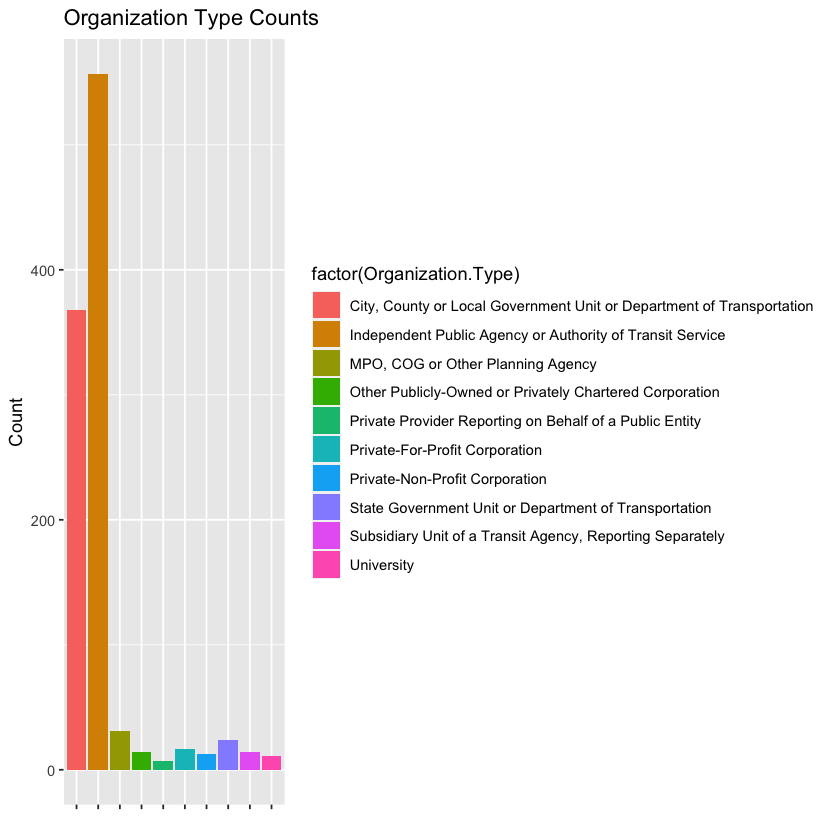

In [29]:
fuel %>%
  group_by(Organization.Type) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = factor(Organization.Type), y = count, fill = factor(Organization.Type))) +
  geom_bar(stat = "identity") +
  labs(title = "Organization Type Counts",
       x = "",  
       y = "Count") +
  theme(axis.text.x = element_blank()) 

From this plot, the major two organization types are City, County, or Local Government and the Independent Public Agency or Authority of Transit Service. They account for much more than 50% of the data. This is insightful to understand what agencies are there but also which ones are being utilized currently, since they may or may not be the optimal ones.

The following plot will allow us to see the relationship of each mode of transportation and the average MPG. It is a great way to make inferences about their relationship and understand which modes of transportation are more efficient.

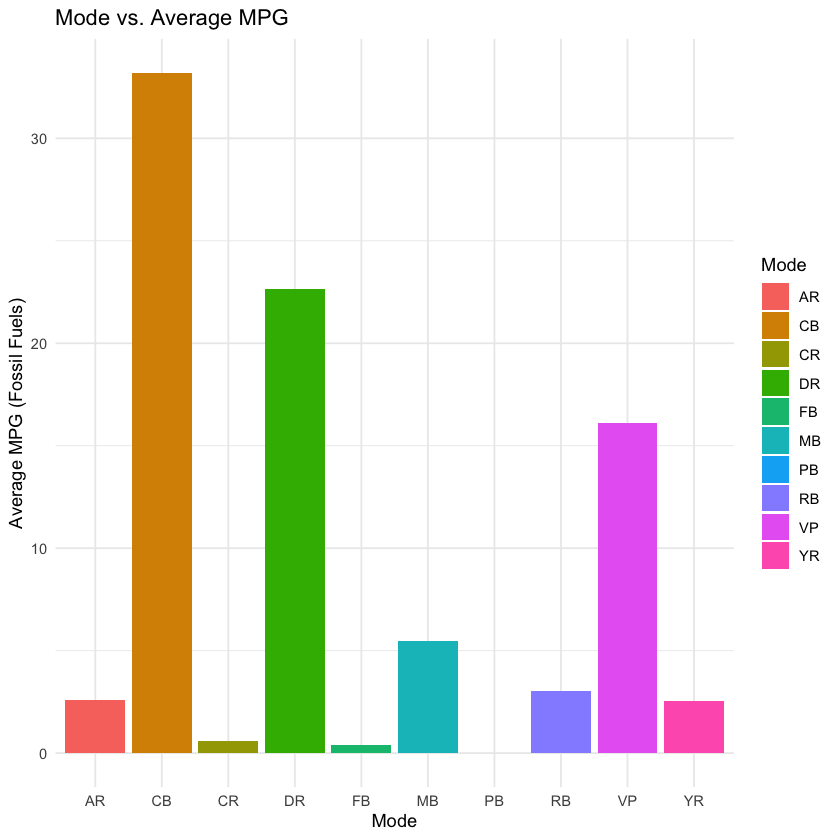

In [30]:
ggplot(fuel, aes(x = Mode, y = avg_mpg_fossil_fuels, fill = Mode)) +
  geom_bar(stat = "summary", fun = "mean", position = "dodge") +
  labs(title = "Mode vs. Average MPG",
       x = "Mode",
       y = "Average MPG (Fossil Fuels)") +
  theme_minimal()

From this plot it seems that the method of transportation clearly matters when it comes to the average MPG. There are some modes of transportation that are clearly more efficient than others. However, this might be due to the lack of data and should be crosschecked. 

This final plot will allow us to see the relationship of each type of service and the average MPG. It is a great way to make inferences about their relationship and understand which types of services of transportation are more efficient.

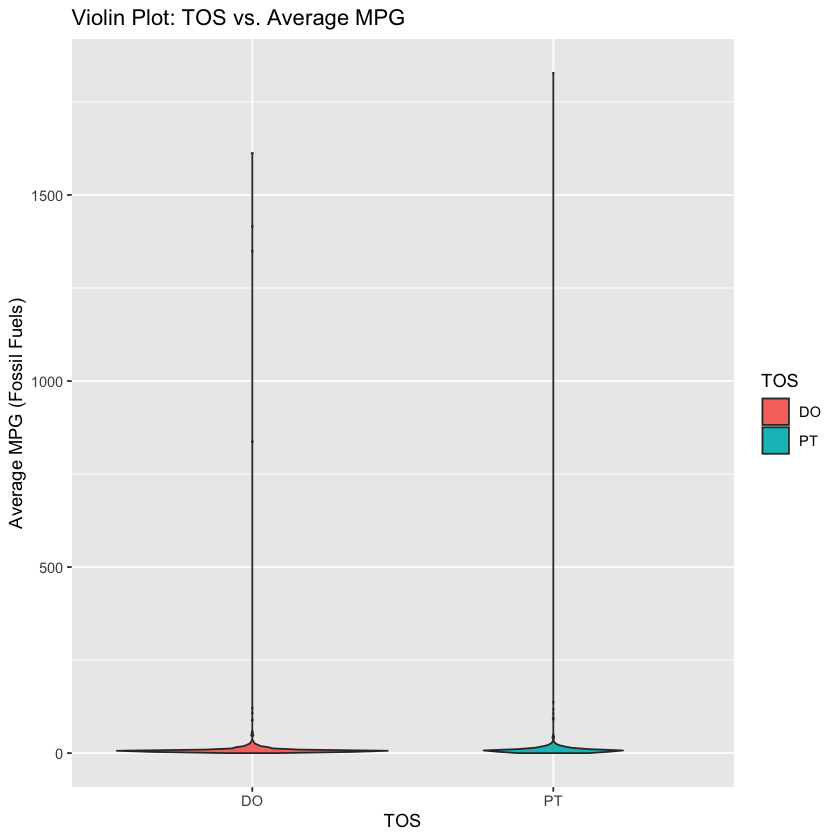

In [37]:
ggplot(fuel, aes(x = TOS, y = avg_mpg_fossil_fuels, fill = TOS)) +
  geom_violin() +
  labs(title = "Violin Plot: TOS vs. Average MPG",
       x = "TOS",
       y = "Average MPG (Fossil Fuels)")

This violin plots don't show much information, as the data is very skewed. However, we can see that the data is very concentrated around the 0. This is important to keep in mind when analyzing the data, as it will be important to understand how the data is distributed.

## Border Crossing Entry Data

This data set contains information of the vehicles and their type that crossed the border between other countries and the US. It was downloaded [here](https://data.transportation.gov/Research-and-Statistics/Border-Crossing-Entry-Data/keg4-3bc2). We will aim to understand the distribution of the data, the outliers, and the relationship between the different variables since this data set will be used to build a naive bayes model. While this data set is not very insightful for the analysis, it can be useful to understand if different mehtods of transportation are valued different or run though different borders.

The following plot displays the distribution of the values of different transportation methods. This will allow us to understand the distribution of the data and if there are any outliers. Furthermore, we will be able to see if they are sparse (which would mean a good sign of different methods of transportation being valued differently) or very squed.

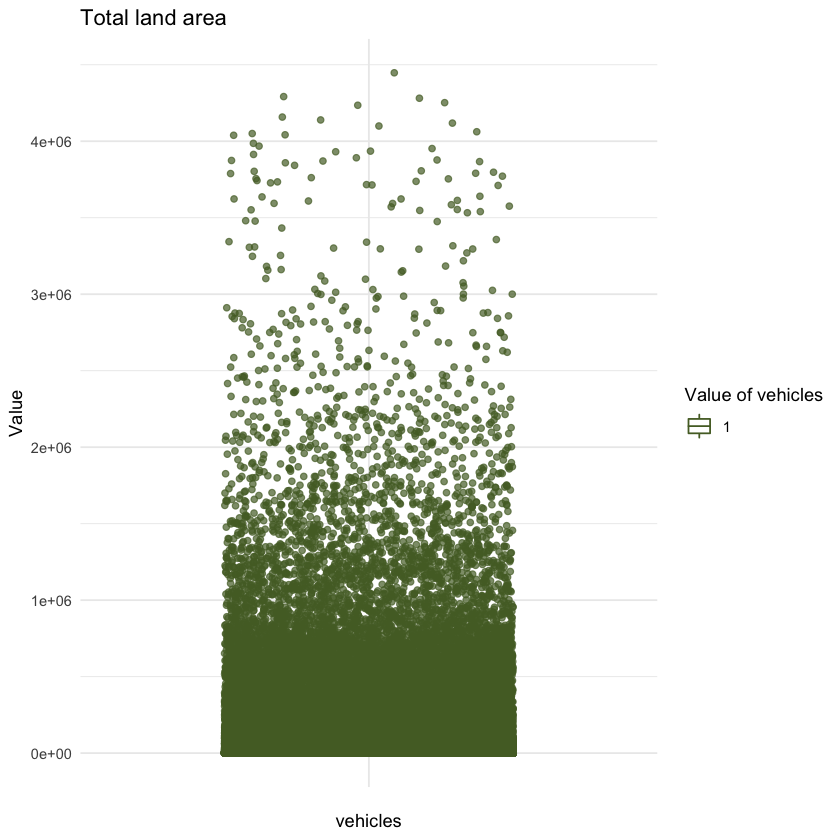

In [34]:
crossing <- read.csv('../../data/Clean_Data_project_Pub.Transport_5000/Clean_Border_Crossing_Entry_Data_20231103.csv')

ggplot(crossing, aes(x = "", y = Value, color = factor(1))) +
  geom_jitter(alpha = 0.7, width = 0.3) +
  geom_boxplot(width = 0.2, outlier.shape = NA, coef = 0) +
  labs(title = "Total land area",
       x = "vehicles",
       y = "Value",
       fill = "Value") +
  scale_color_manual(values = c("darkolivegreen")) +
  theme_minimal() +
  guides(color = guide_legend(title = "Value of vehicles"))


From this plot, we can see that the data seems sparse, which means that different methods of transportation are valued differently. This is a good sign as we might be able to use this to predict the method of transportation (even though we cannot determine this until we test it).

The following plot will display the count of each method of transportation. This allow us to see if we have similar number of data points for each method of transportation or if some are more popular than others.

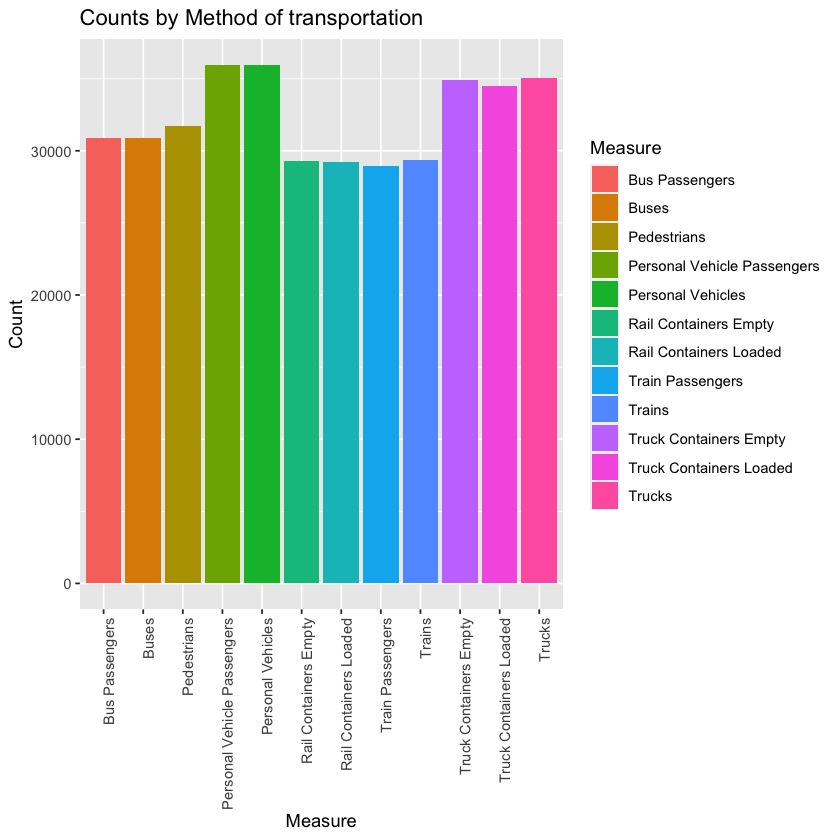

In [39]:
crossing %>%
  group_by(Measure) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = Measure, y = count, fill = Measure)) +
  geom_bar(stat = "identity") +
  labs(title = "Counts by Method of transportation", x = "Measure", y = "Count") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

All methods seem to have the same popularity, which is great for our analysis. This means that we will have enough data points for each method of transportation to make predictions.

This final plot will show us the count of crossings in each state. This will help us identify the most popular states for crossing into or out from the US and understand better the nature of our data set.

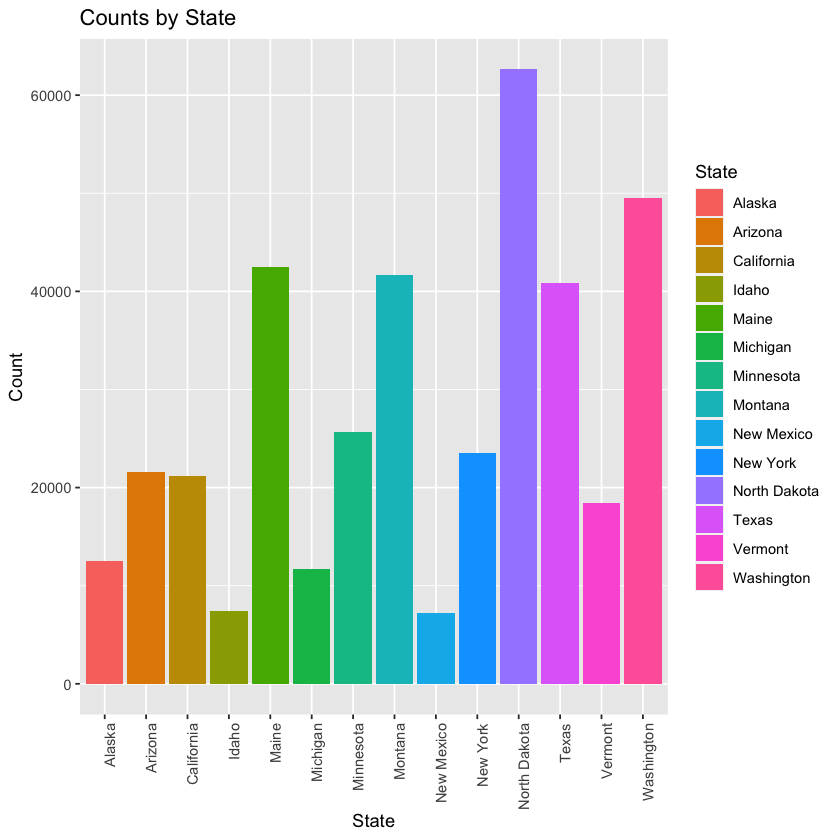

In [38]:
crossing %>%
  group_by(State) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = State, y = count, fill = State)) +
  geom_bar(stat = "identity") +
  labs(title = "Counts by State",
       x = "State",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

This plot shows us that the most popular states is North Dakota followed by Washington. This is important to keep in mind as these states might have some specific types of transportation that are more popular than others.

## Other datasets that will help us with insights

These data sets will help us with insights on the data we are working with. While they have not been further analyzed with other time due to time constraints, they reveal relevant insights about the public transportation industry.

### Vehicle Production by countries
Here, we will be exploring the vehicle_production_countries data set. It will allow us understand which countries are the major producers and how this production changed over time. This will allow us to understand the industry better and see if there are any trends that we can use to make predictions.

In [ ]:
library(tidyverse)
library(ggplot2)
library(boot)
library(AICcmodavg)
library(readxl)
library(broom)

vehicle_production_countries_comercial <- read_excel("../../data/Raw_Data_project_Pub.Transport_5000/vehicle_production_countries.xlsx", sheet="Comercial-vehicles", skip = 1)

vehicle_production_countries_comercial[-1] <- lapply(vehicle_production_countries_comercial[-1], function(x) ifelse(x %in% c("N", "U", "Z"), NA, x))

vehicle_production_countries_comercial <- vehicle_production_countries_comercial %>%
  mutate(across(-1, as.numeric))

colnames(vehicle_production_countries_comercial)[colnames(vehicle_production_countries_comercial) == "...1"] <- "Country"
colnames(vehicle_production_countries_comercial)

vehicle_production_countries_comercial_transposed <- as.data.frame(t(vehicle_production_countries_comercial))

colnames(vehicle_production_countries_comercial_transposed) <- vehicle_production_countries_comercial_transposed[1, ]

vehicle_production_countries_comercial_transposed <- vehicle_production_countries_comercial_transposed[-1, ]

vehicle_production_countries_comercial_transposed[] <- lapply(vehicle_production_countries_comercial_transposed, as.numeric)

vehicle_production_countries_comercial_transposed <- vehicle_production_countries_comercial_transposed[, !colnames(vehicle_production_countries_comercial_transposed) %in% "Total world"]

df <- vehicle_production_countries_comercial_transposed %>% 
  rownames_to_column(var = "Year")

df <- df %>%
  mutate(Year = ifelse(Year == "(R) 2019", 2019, ifelse(Year == "(R) 2020", 2020, Year)))

Warning message:
"Removed 188 rows containing missing values (geom_point)."


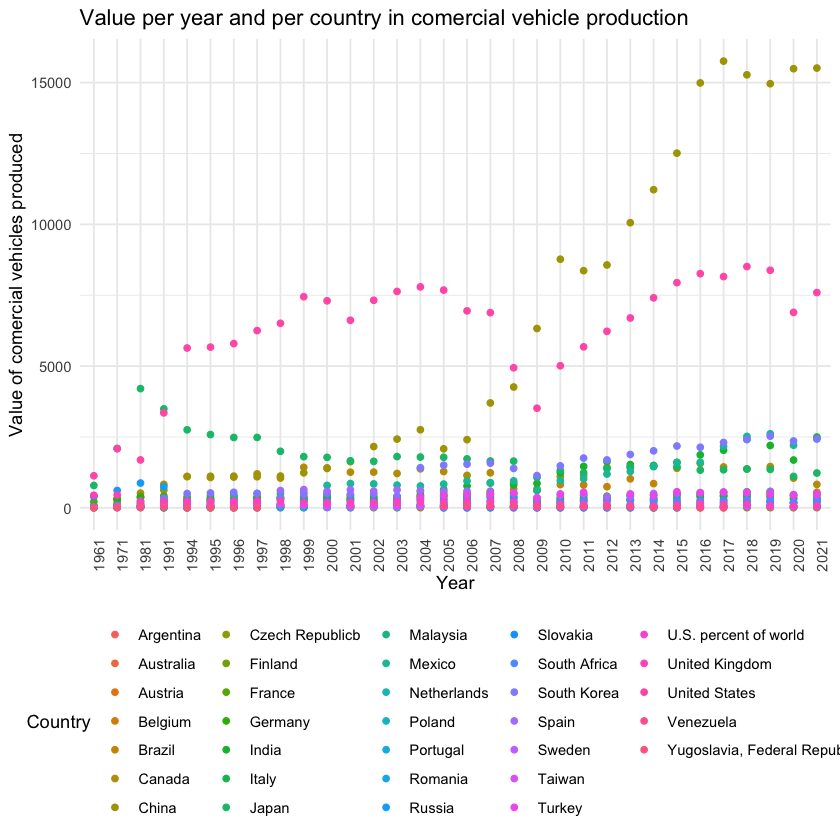

In [161]:
df_long <- df %>%
  pivot_longer(-Year, names_to = "Country", values_to = "Value")

ggplot(df_long, aes(x = Year, y = Value, color = Country)) +
  geom_point() +
  labs(
    title = "Value per year and per country in comercial vehicle production",
    x = "Year",
    y = "Value of comercial vehicles produced"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom", axis.text.x = element_text(angle = 90, hjust = 1))


From this plot we can see how Japan (back in the 1960s) used to be one of the biggest producers but not anymore. The US has been in the lead since the 1990s until around 2008, which was expected due to the recession. However, it is impressive how China was able to excel during the recession in this market at an almost exponential rate. And it still has kept increasing since then. 

In order to run an ANOVA test and look if countries, years, and interaction among the both have an statistical significance on comercial vehicle production, we are going to assume that all the missing values are not relevant to the contribution of the overall market and, therefore, close to 0. Thuis, for the sake of this process, we will make them 0.

In [ ]:
vehicle_production_countries_comercial <- replace(vehicle_production_countries_comercial, is.na(vehicle_production_countries_comercial), 0)

In [152]:
data_long <- vehicle_production_countries_comercial %>%
  pivot_longer(cols = -Country, names_to = "Year", values_to = "Value")

data_long <- data_long[data_long$Country != "Total world", ]

model <- aov(Value ~ Year * Country, data = data_long)

summary_model <- summary(model)

print(anova(model, test = "F"))

Warning message in anova.lm(object):
"ANOVA F-tests on an essentially perfect fit are unreliable"


Analysis of Variance Table

Response: Value
              Df     Sum Sq  Mean Sq F value Pr(>F)
Year          31   85531235  2759072     NaN    NaN
Country       32 2172668273 67895884     NaN    NaN
Year:Country 992 1139993857  1149187     NaN    NaN
Residuals      0          0      NaN               


Seing this, we will simplify our model, taking away the interaction (in order to no overfit the data with our ANOVA model).

In [486]:
model <- aov(Value ~ Year + Country, data = data_long)

summary_model <- summary(model)

print(anova(model, test = "F"))

Analysis of Variance Table

Response: Value
           Df     Sum Sq  Mean Sq F value    Pr(>F)    
Year       31   85531235  2759072  2.4009 3.244e-05 ***
Country    32 2172668273 67895884 59.0816 < 2.2e-16 ***
Residuals 992 1139993857  1149187                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Both have a significant effect (which was expected). However, this helped us also understand that their interaction would overfit the model in this case.

### Energy and usage of Buses
In this part, we will be exploring the energy_consumed_byMill_passenger_MILES file.

In [ ]:
energy_consum <- read_excel("../../data/Raw_Data_project_Pub.Transport_5000/energy_consumed_byMill_passenger_MILES.xlsx", sheet="Energy")

colnames(energy_consum) <- energy_consum[1, ]

energy_consum <- energy_consum[-1, ]

colnames(energy_consum)[1] <- "Data_to_Explore"

energy_consum <- energy_consum[energy_consum$Data_to_Explore %in% c(
  "Vehicle-miles (millions)",
  "Passenger-miles (millions)",
  "Energy consumed, total (billion Btu)",
  "Energy intensity (Btu/passenger-mile)"
), ]

energy_consum[, -1] <- apply(energy_consum[, -1], 2, function(x) ifelse(x == "N", NA, x))

energy_consum <- energy_consum %>% select(-"1960", -"1965", -"1970", -"1975", -"1980", -"1985", -"1990", -"1991", -"1992", -"1993", -"1994", -"1995")

energy_consum <- energy_consum %>%
  mutate_at(vars(-1), as.numeric)

energy_consum_long <-as.data.frame(t(energy_consum), index=False)

colnames(energy_consum_long) <- energy_consum_long[1, ]

energy_consum_long <- energy_consum_long[-1, ]

colnames(energy_consum_long) <- c("Vehicle_milesMill", "Passenger_miles_mill","Energy_consumed_total_bill_Btu", "Energy_intensity_Btu_passenger_mile")

Years = c(1996:2021)
energy_consum_long['Years'] <- Years

energy_consum_long_no_Covid <- energy_consum_long[!(energy_consum_long$Years %in% c(2020, 2021)), ]

For the fitted model in the following plots, year 2020 and 2021 are going to be ignored and considered outliers due to COVID-19. They are heavy outliers.

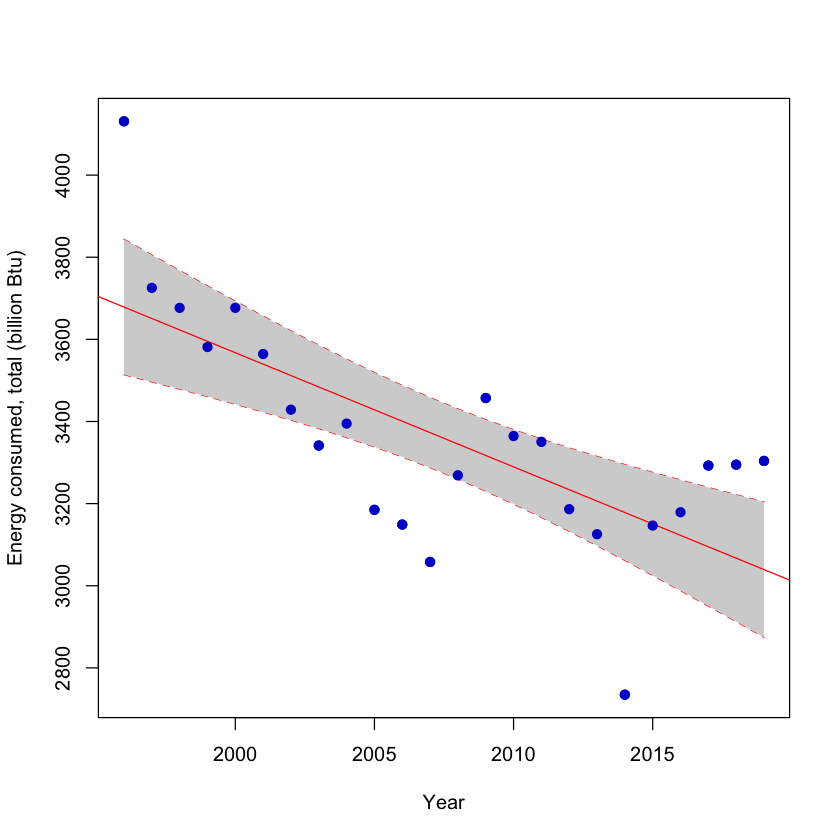

In [19]:
lm_model <- lm(energy_consum_long_no_Covid$Energy_intensity_Btu_passenger_mile ~ energy_consum_long_no_Covid$Year)

plot(energy_consum_long_no_Covid$Year, energy_consum_long_no_Covid$Energy_intensity_Btu_passenger_mile,
     xlab = "Year",
     ylab = "Energy consumed, total (billion Btu)",
     col = "blue3",
     pch = 19)

conf_int <- predict(lm_model, interval = "confidence")

lines(energy_consum_long_no_Covid$Year, conf_int[, "lwr"], col = "red", lty = 2)
lines(energy_consum_long_no_Covid$Year, conf_int[, "upr"], col = "red", lty = 2)

polygon(c(energy_consum_long_no_Covid$Year, rev(energy_consum_long_no_Covid$Year)),
        c(conf_int[, "lwr"], rev(conf_int[, "upr"])),
        col = "lightgray", border = NA)

abline(lm_model, col = "red")

points(energy_consum_long_no_Covid$Year, energy_consum_long_no_Covid$Energy_intensity_Btu_passenger_mile, col = "blue3", pch = 19)

From this plot we can see how the total energy consumed (in billion Btu) has been constantly decreasing. However, is it because our vehicles are more efficient or due to cuts in public transportation?

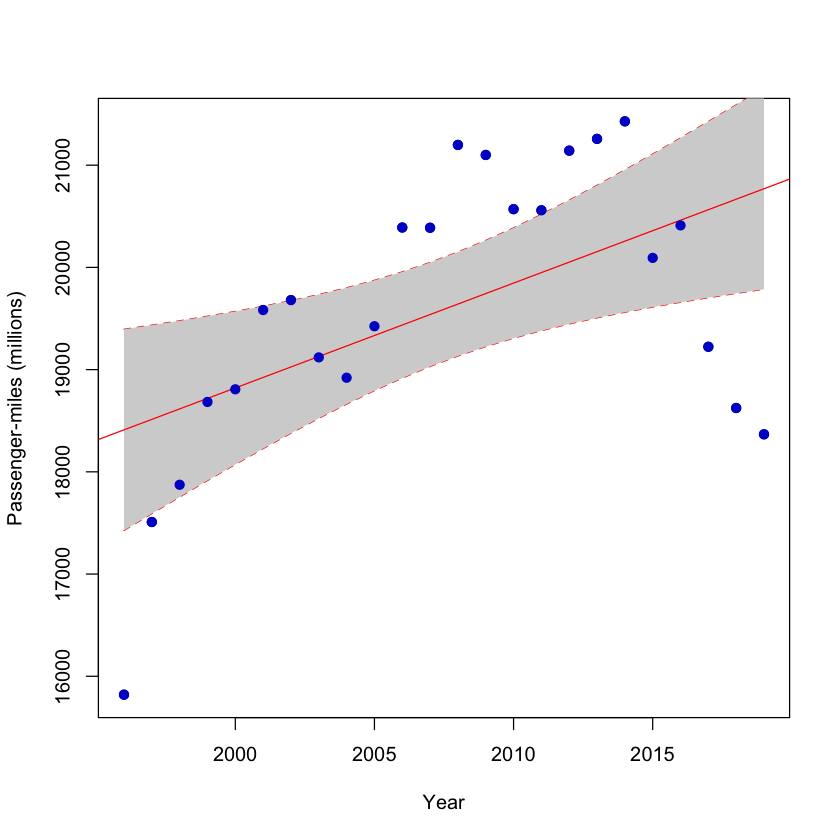

In [21]:
lm_model <- lm(energy_consum_long_no_Covid$Passenger_miles_mill ~ energy_consum_long_no_Covid$Year)

plot(energy_consum_long_no_Covid$Year, energy_consum_long_no_Covid$Passenger_miles_mill,
     xlab = "Year",
     ylab = "Passenger-miles (millions)",
     col = "blue3",
     pch = 19)

conf_int <- predict(lm_model, interval = "confidence")

lines(energy_consum_long_no_Covid$Year, conf_int[, "lwr"], col = "red", lty = 2)
lines(energy_consum_long_no_Covid$Year, conf_int[, "upr"], col = "red", lty = 2)

polygon(c(energy_consum_long_no_Covid$Year, rev(energy_consum_long_no_Covid$Year)),
        c(conf_int[, "lwr"], rev(conf_int[, "upr"])),
        col = "lightgray", border = NA)

abline(lm_model, col = "red")

points(energy_consum_long_no_Covid$Year, energy_consum_long_no_Covid$Passenger_miles_mill, col = "blue3", pch = 19)

While the fitted model shows an increase in the usage of public transportation, we can see that it has been constantly dropping since around 2014. This can bring up many questions such as: Is it due to an investment problem? Is it because there are not enough incentives to use public transportation? Do people own more cars?

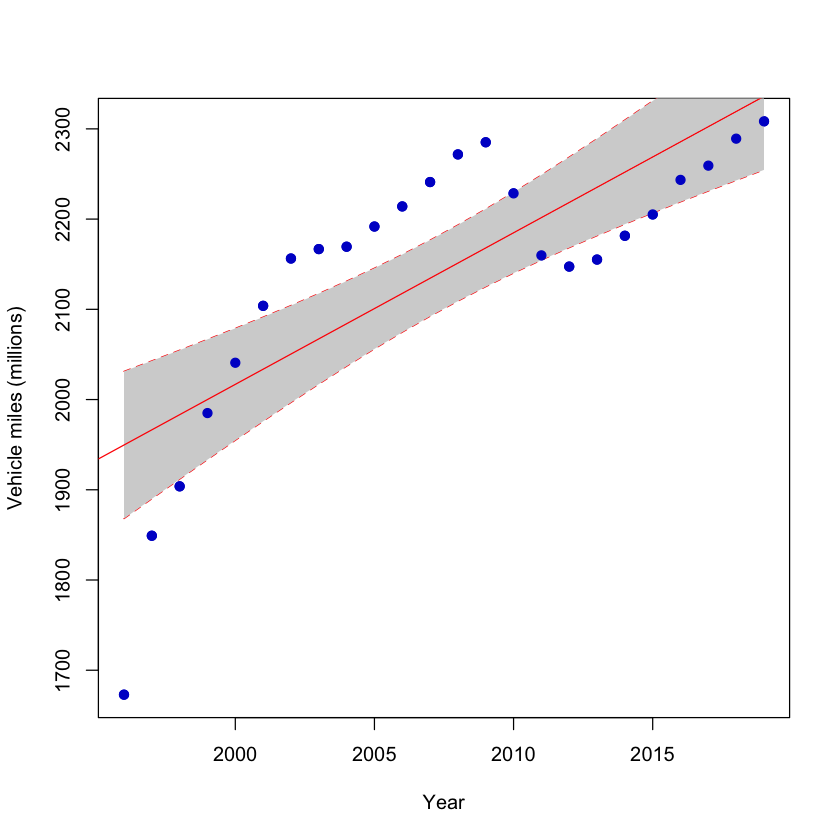

In [25]:
lm_model <- lm(energy_consum_long_no_Covid$Vehicle_milesMill ~ energy_consum_long_no_Covid$Year)

plot(energy_consum_long_no_Covid$Year, energy_consum_long_no_Covid$Vehicle_milesMill,
     xlab = "Year",
     ylab = "Vehicle miles (millions)",
     col = "blue3",
     pch = 19)

conf_int <- predict(lm_model, interval = "confidence")

lines(energy_consum_long_no_Covid$Year, conf_int[, "lwr"], col = "red", lty = 2)
lines(energy_consum_long_no_Covid$Year, conf_int[, "upr"], col = "red", lty = 2)

polygon(c(energy_consum_long_no_Covid$Year, rev(energy_consum_long_no_Covid$Year)),
        c(conf_int[, "lwr"], rev(conf_int[, "upr"])),
        col = "lightgray", border = NA)

abline(lm_model, col = "red")

points(energy_consum_long_no_Covid$Year, energy_consum_long_no_Covid$Vehicle_milesMill, col = "blue3", pch = 19)

The vehicle miles have been constantly increasing, which means that there have been more and more routes added over time. However, why has this not been enough to increase the demand of public transportation?

### DC Metro Scorecard
This part will focus on the DC_Metro_Scorecard data, which counts the reliability and efficiency of DC Metro from 2014 to 2016.

In [27]:
DC_metro <- read_excel("../../data/Raw_Data_project_Pub.Transport_5000/DC_Metro_Scorecard.xlsx", sheet="Sheet1")

DC_metro <- DC_metro%>% select (-"Crimes Target", -"Employee Injury Rate Target", -"Customer Injury Rate Target", -"Elevator Reliability", -"Elevator Reliability Target", -"Escalator Reliability Target",
-"Rail Fleet Reliability Target", -"Bus On-Time Performance Target", -"Bus Fleet Reliability Target", -"Escalator Reliability", -"Rail On-Time Performance Target")

colnames(DC_metro) <- c('Year','Month','Bus_on_time','Bus_fleet_reliability','Rail_fleet_reliability', 'Rail_on_time', 'Customer_injury_rate_per_1_Mill', 'Employee_injury_rate_per_200k_h', 'Crimes_per_1_Mill_passengers', 'Crimes_per_1_Mill_passengers')


Firstly, we are going to see wherther the year and the month have a significant effect on the values seen in our data. This will help us understand if it has become better over the years or if there are months that have effects on the outcomes of public transportation due to weather or other circumstances.

In [458]:
Bus_on_time <- DC_metro %>% select('Year', 'Month', 'Bus_on_time')

model <- aov(Bus_on_time ~ Year + Month, data = Bus_on_time)

summary_model <- summary(model)

print(anova(model, test = "F"))

Analysis of Variance Table

Response: Bus_on_time
          Df    Sum Sq    Mean Sq F value    Pr(>F)    
Year       2 0.0012562 0.00062809  7.6584 0.0031782 ** 
Month     12 0.0056355 0.00046963  5.7263 0.0002625 ***
Residuals 21 0.0017223 0.00008201                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Clearly year and month seem to have a significant effect on the buses being on time.

In [459]:
Bus_fleet_reliability <- DC_metro %>% select('Year', 'Month', 'Bus_fleet_reliability')

model <- aov(Bus_fleet_reliability ~ Year + Month, data = Bus_fleet_reliability)

summary_model <- summary(model)

print(anova(model, test = "F"))

Analysis of Variance Table

Response: Bus_fleet_reliability
          Df  Sum Sq Mean Sq F value   Pr(>F)   
Year       2 5604536 2802268  9.3323 0.001259 **
Month     12 9091418  757618  2.5231 0.030574 * 
Residuals 21 6305777  300275                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Clearly year and month seem to have a significant effect on the bus fleet reliability (miles travelled before a breakdown).

In [460]:
Rail_fleet_reliability <- DC_metro %>% select('Year', 'Month', 'Rail_fleet_reliability')

model <- aov(Rail_fleet_reliability ~ Year + Month, data = Rail_fleet_reliability)

summary_model <- summary(model)

print(anova(model, test = "F"))

Analysis of Variance Table

Response: Rail_fleet_reliability
          Df     Sum Sq   Mean Sq F value  Pr(>F)  
Year       2  536503502 268251751  2.8728 0.07892 .
Month     12 2480920803 206743400  2.2141 0.05343 .
Residuals 21 1960928969  93377570                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In this case, year and month don't seem to have a significant effect on rail transportation fleet reliability (miles travelled before a breakdown).

In [462]:
Rail_on_time <- DC_metro %>% select('Year', 'Month', 'Rail_on_time')

model <- aov(Rail_on_time ~ Year + Month, data = Rail_on_time)

summary_model <- summary(model)

print(anova(model, test = "F"))

Analysis of Variance Table

Response: Rail_on_time
          Df   Sum Sq   Mean Sq F value    Pr(>F)    
Year       2 0.060978 0.0304888 52.2126 7.084e-09 ***
Month     12 0.020835 0.0017363  2.9734   0.01397 *  
Residuals 21 0.012263 0.0005839                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Clearly year and month seem to have a significant effect on the rail transportation being on time.

In [466]:
Customer_injury_rate_per_1_Mill <- DC_metro %>% select('Year', 'Month', 'Customer_injury_rate_per_1_Mill')

model <- aov(Customer_injury_rate_per_1_Mill ~ Year + Month, data = Customer_injury_rate_per_1_Mill)

summary_model <- summary(model)

print(anova(model, test = "F"))

Analysis of Variance Table

Response: Customer_injury_rate_per_1_Mill
          Df  Sum Sq Mean Sq F value  Pr(>F)  
Year       2  0.1121 0.05606  0.1770 0.83903  
Month     12 11.8039 0.98366  3.1056 0.01119 *
Residuals 21  6.6515 0.31674                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Only the month seems to have a significant effect on the customer injury rate (which is expected due to weather). However, if year does not, have we taken any necessary actions to improve the security on public transportation?

In [467]:
Employee_injury_rate_per_200k_h <- DC_metro %>% select('Year', 'Month', 'Employee_injury_rate_per_200k_h')

model <- aov(Employee_injury_rate_per_200k_h ~ Year + Month, data = Employee_injury_rate_per_200k_h)

summary_model <- summary(model)

print(anova(model, test = "F"))

Analysis of Variance Table

Response: Employee_injury_rate_per_200k_h
          Df Sum Sq Mean Sq F value  Pr(>F)   
Year       2 11.822  5.9109  9.0165 0.00149 **
Month     12 12.759  1.0632  1.6218 0.16025   
Residuals 21 13.767  0.6556                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In this case as year has a significant effect on employee injury rates and months do not, we can assume that some actions have been taken during the years.

In [468]:
Crimes_per_1_Mill_passengers <- DC_metro %>% select('Year', 'Month', 'Crimes_per_1_Mill_passengers')

model <- aov(Crimes_per_1_Mill_passengers ~ Year + Month, data = Crimes_per_1_Mill_passengers)

summary_model <- summary(model)

print(anova(model, test = "F"))

Analysis of Variance Table

Response: Crimes_per_1_Mill_passengers
          Df  Sum Sq Mean Sq F value  Pr(>F)  
Year       1  0.2313 0.23133  0.6465 0.44209  
Month     12 14.6777 1.22314  3.4182 0.03656 *
Residuals  9  3.2205 0.35783                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Only months seem to have a significant effect on crime rates produced on public transportation. We could use this information to decide what months of the year we should increase security and question if this effect is due to holidays or other important events.

In [ ]:

DC_metro <- DC_metro %>%
      mutate_at("Year", str_replace, "CY ", "")
head(DC_metro)

DC_metro$Year <- as.numeric(DC_metro$Year)

DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Jan", "01")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Feb", "02")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Mar", "03")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Apr", "04")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "May", "05")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Jun", "06")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Jul", "07")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Aug", "08")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Sep", "09")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Oct", "10")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Nov", "11")
DC_metro <- DC_metro %>%
      mutate_at("Month", str_replace, "Dec", "12")

DC_metro <- DC_metro[order(DC_metro$Year, DC_metro$Month), ]

DC_metro <- subset(DC_metro, DC_metro$Month!='YTD')
head(DC_metro)

library(zoo)

DC_metro$Date <- as.yearmon(paste(DC_metro$Month, DC_metro$Year, sep = " "), format = "%m %Y")

`geom_smooth()` using formula 'y ~ x'



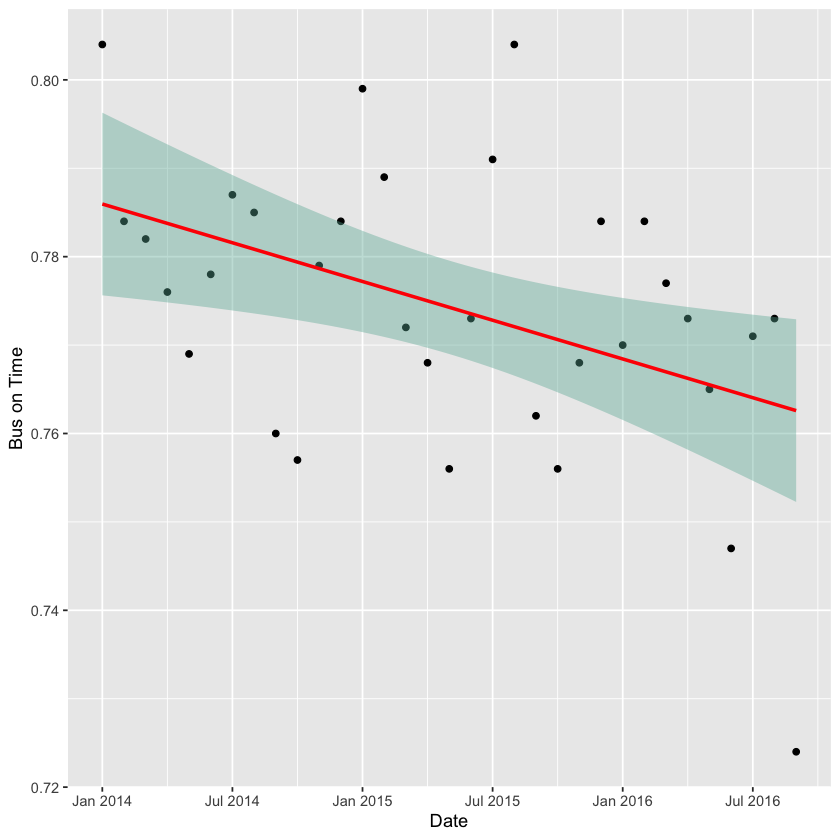

In [30]:
options(warn = -1) 
ggplot(DC_metro, aes(x=DC_metro$Date, y=DC_metro$Bus_on_time)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  xlab("Date") +  
  ylab("Bus on Time") 

While the spread of the points is very wide, it is concerning to see a trend in which the Buses seem to be more and more delayed over time. This means that we are not taking the necessary steps to improve it.

`geom_smooth()` using formula 'y ~ x'



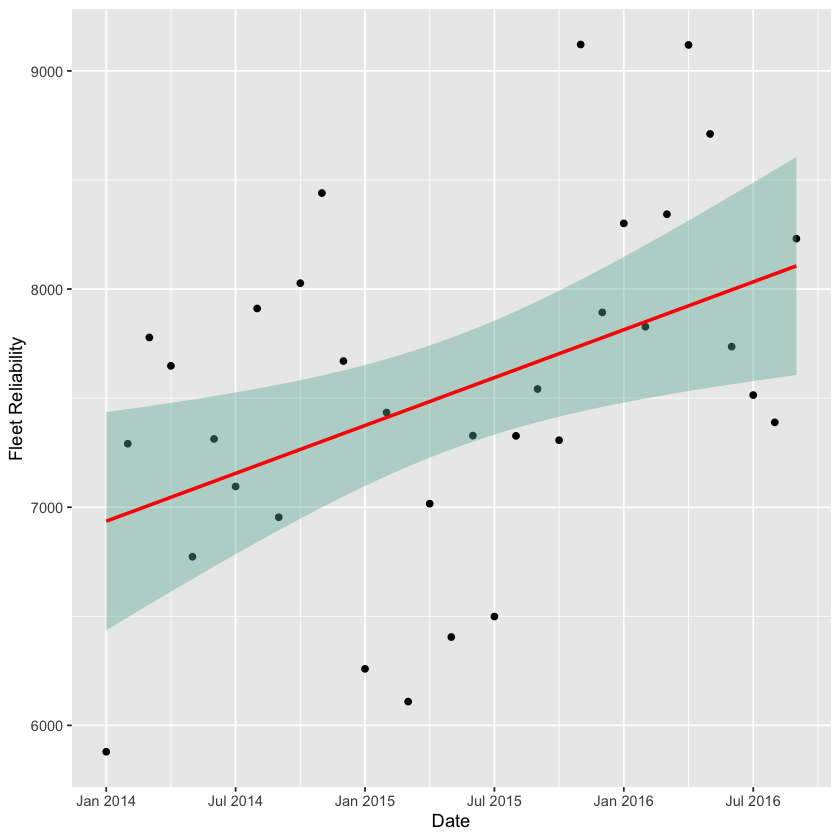

In [32]:
options(warn = -1) 
ggplot(DC_metro, aes(x=DC_metro$Date, y=DC_metro$Bus_fleet_reliability)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  xlab("Date") + 
  ylab("Fleet Reliability") 

Fleet reliability has improved over time (even though the spread of the data is too wide). That is probably due to vehicle improvements.

`geom_smooth()` using formula 'y ~ x'



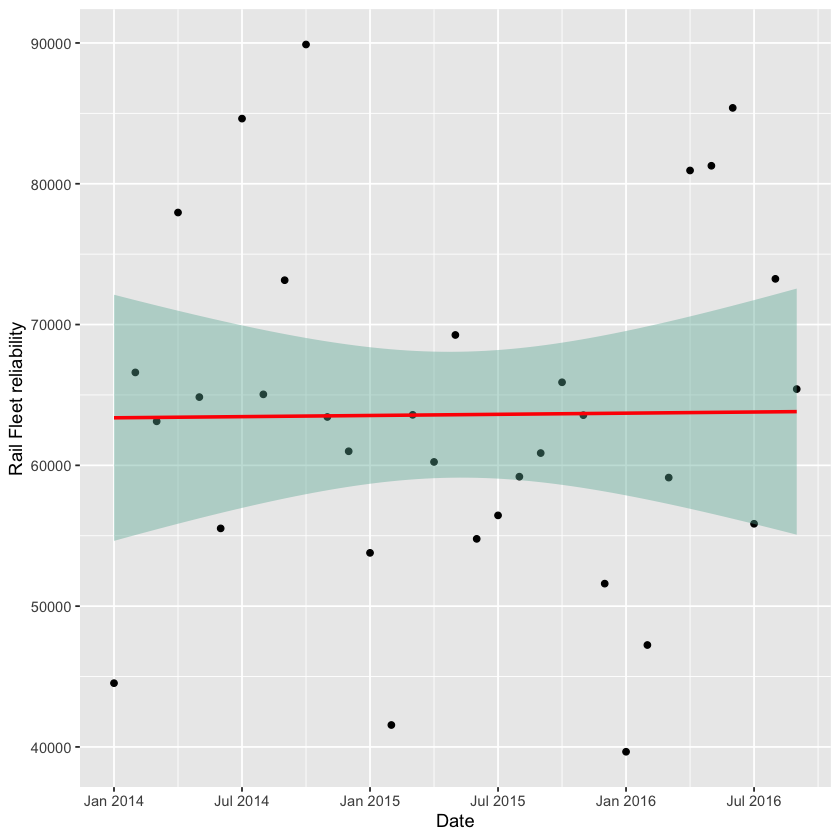

In [34]:
options(warn = -1) 
ggplot(DC_metro, aes(x=DC_metro$Date, y=DC_metro$Rail_fleet_reliability)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  xlab("Date") + 
  ylab("Rail Fleet reliability")  

There seems to not be a clear improvement on the fleet reliability of rail transportation over this period of time.

`geom_smooth()` using formula 'y ~ x'



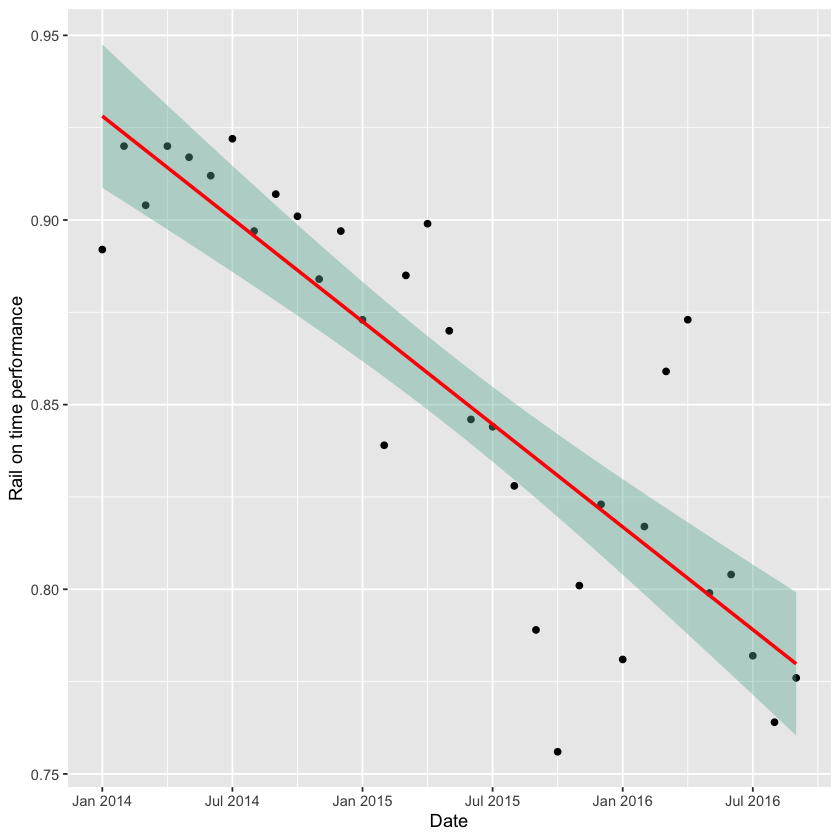

In [36]:
options(warn = -1) 
ggplot(DC_metro, aes(x=DC_metro$Date, y=DC_metro$Rail_on_time)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  xlab("Date") + 
  ylab("Rail on time performance") 

Rail transportation seems to clearly have been getting worse over time. This problem is concerning and should be tackled as soon as possible. Is it due to safety reasons, investment problems, or poor planification?

`geom_smooth()` using formula 'y ~ x'



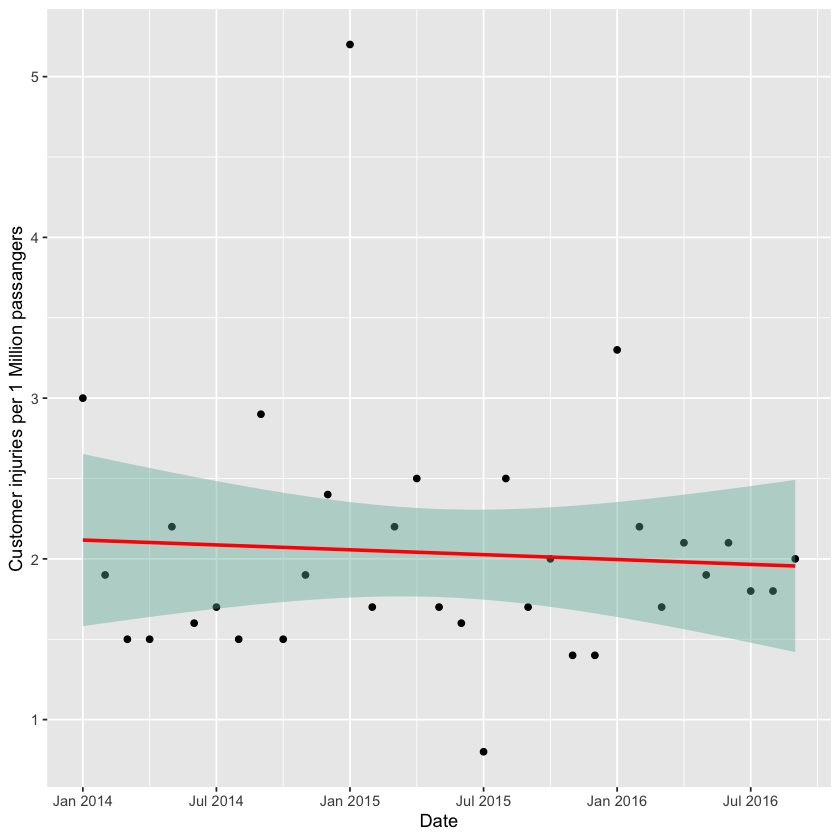

In [37]:
options(warn = -1) 
ggplot(DC_metro, aes(x=DC_metro$Date, y=DC_metro$Customer_injury_rate_per_1_Mill)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  xlab("Date") +  
  ylab("Customer injuries per 1 Million passangers")  

Customer injuries seem to have been stable overtime (with a couple of outliers that could be interesting to look for).

`geom_smooth()` using formula 'y ~ x'



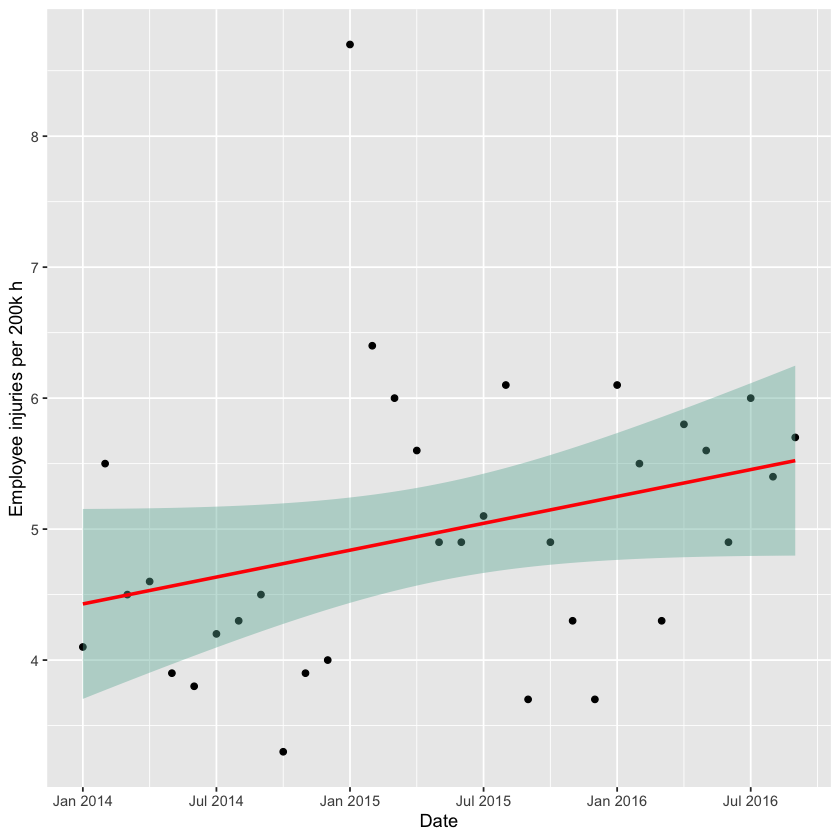

In [40]:
options(warn = -1) 
ggplot(DC_metro, aes(x=DC_metro$Date, y=DC_metro$Employee_injury_rate_per_200k_h)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  xlab("Date") +  
  ylab("Employee injuries per 200k h") 

The employee injuries have been increasing over time. This means that if the trend keeps following this pattern, we should probably invest more in safety and take some more precautions for the employees.

`geom_smooth()` using formula 'y ~ x'



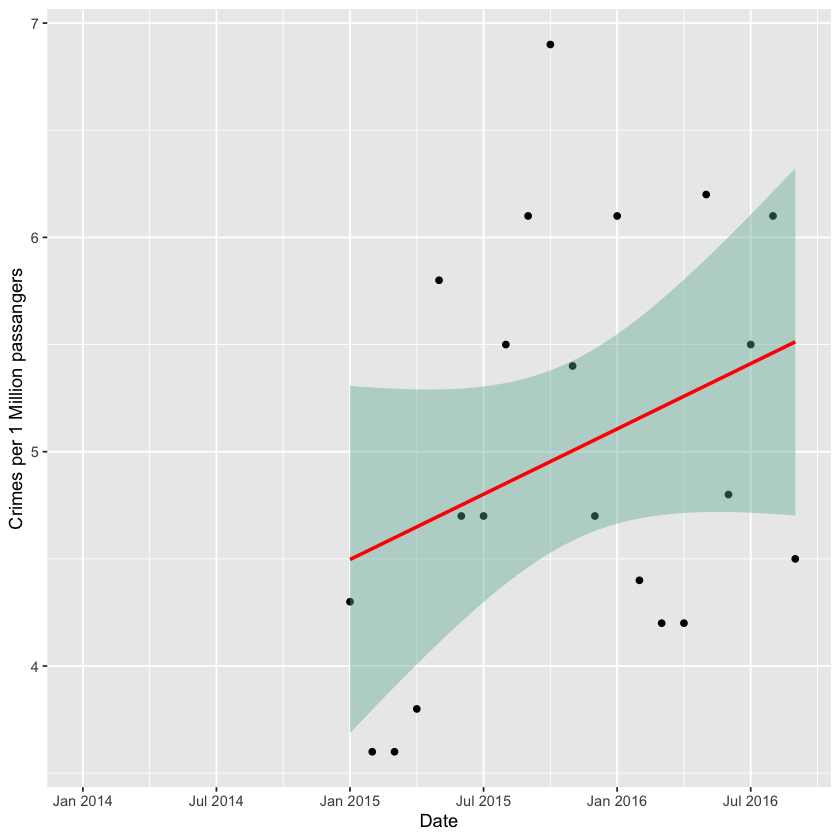

In [39]:
options(warn = -1) 
ggplot(DC_metro, aes(x=DC_metro$Date, y=DC_metro$Crimes_per_1_Mill_passengers)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  xlab("Date") + 
  ylab("Crimes per 1 Million passangers") 

The crime rates have been increasing over time. This means that if the trend keeps following this pattern, we should probably invest in more security on public transportation.

## Text Data
In order to see what what are the most important concerns regarding public transportation to the users, we are going top explore what people mention the most in their reddits about public transportation through a word cloud. 

In [ ]:
import re
import spacy.lang.en.stop_words as stopwords
import spacy
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.feature_extraction.text import CountVectorizer

df=pd.read_json("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/sentiment_results.json")
print(df.shape)
print(df.columns)

df = df[df.text != '']
print(df.shape)
print(df.columns)

texts = []
y = []

parser = spacy.load('en_core_web_sm')
stop_words = stopwords.STOP_WORDS


for i in range(df.shape[0]):

    keep = "abcdefghijklmnopqrstuvwxyz "
    replace = ".,!;"
    tmp = ""
    text_value = df["text"].iloc[i]  


    text_value = re.sub('[^a-zA-Z ]+', '', text_value.replace("<br />", "").lower())
    text_value = parser(text_value)
    tokens = [token.lower_ for token in text_value]
    tokens = [token.lemma_ for token in text_value if token not in stop_words]


    tmp = " ".join(tokens)
    texts.append(tmp)
wordcloud_text = " ".join(texts)


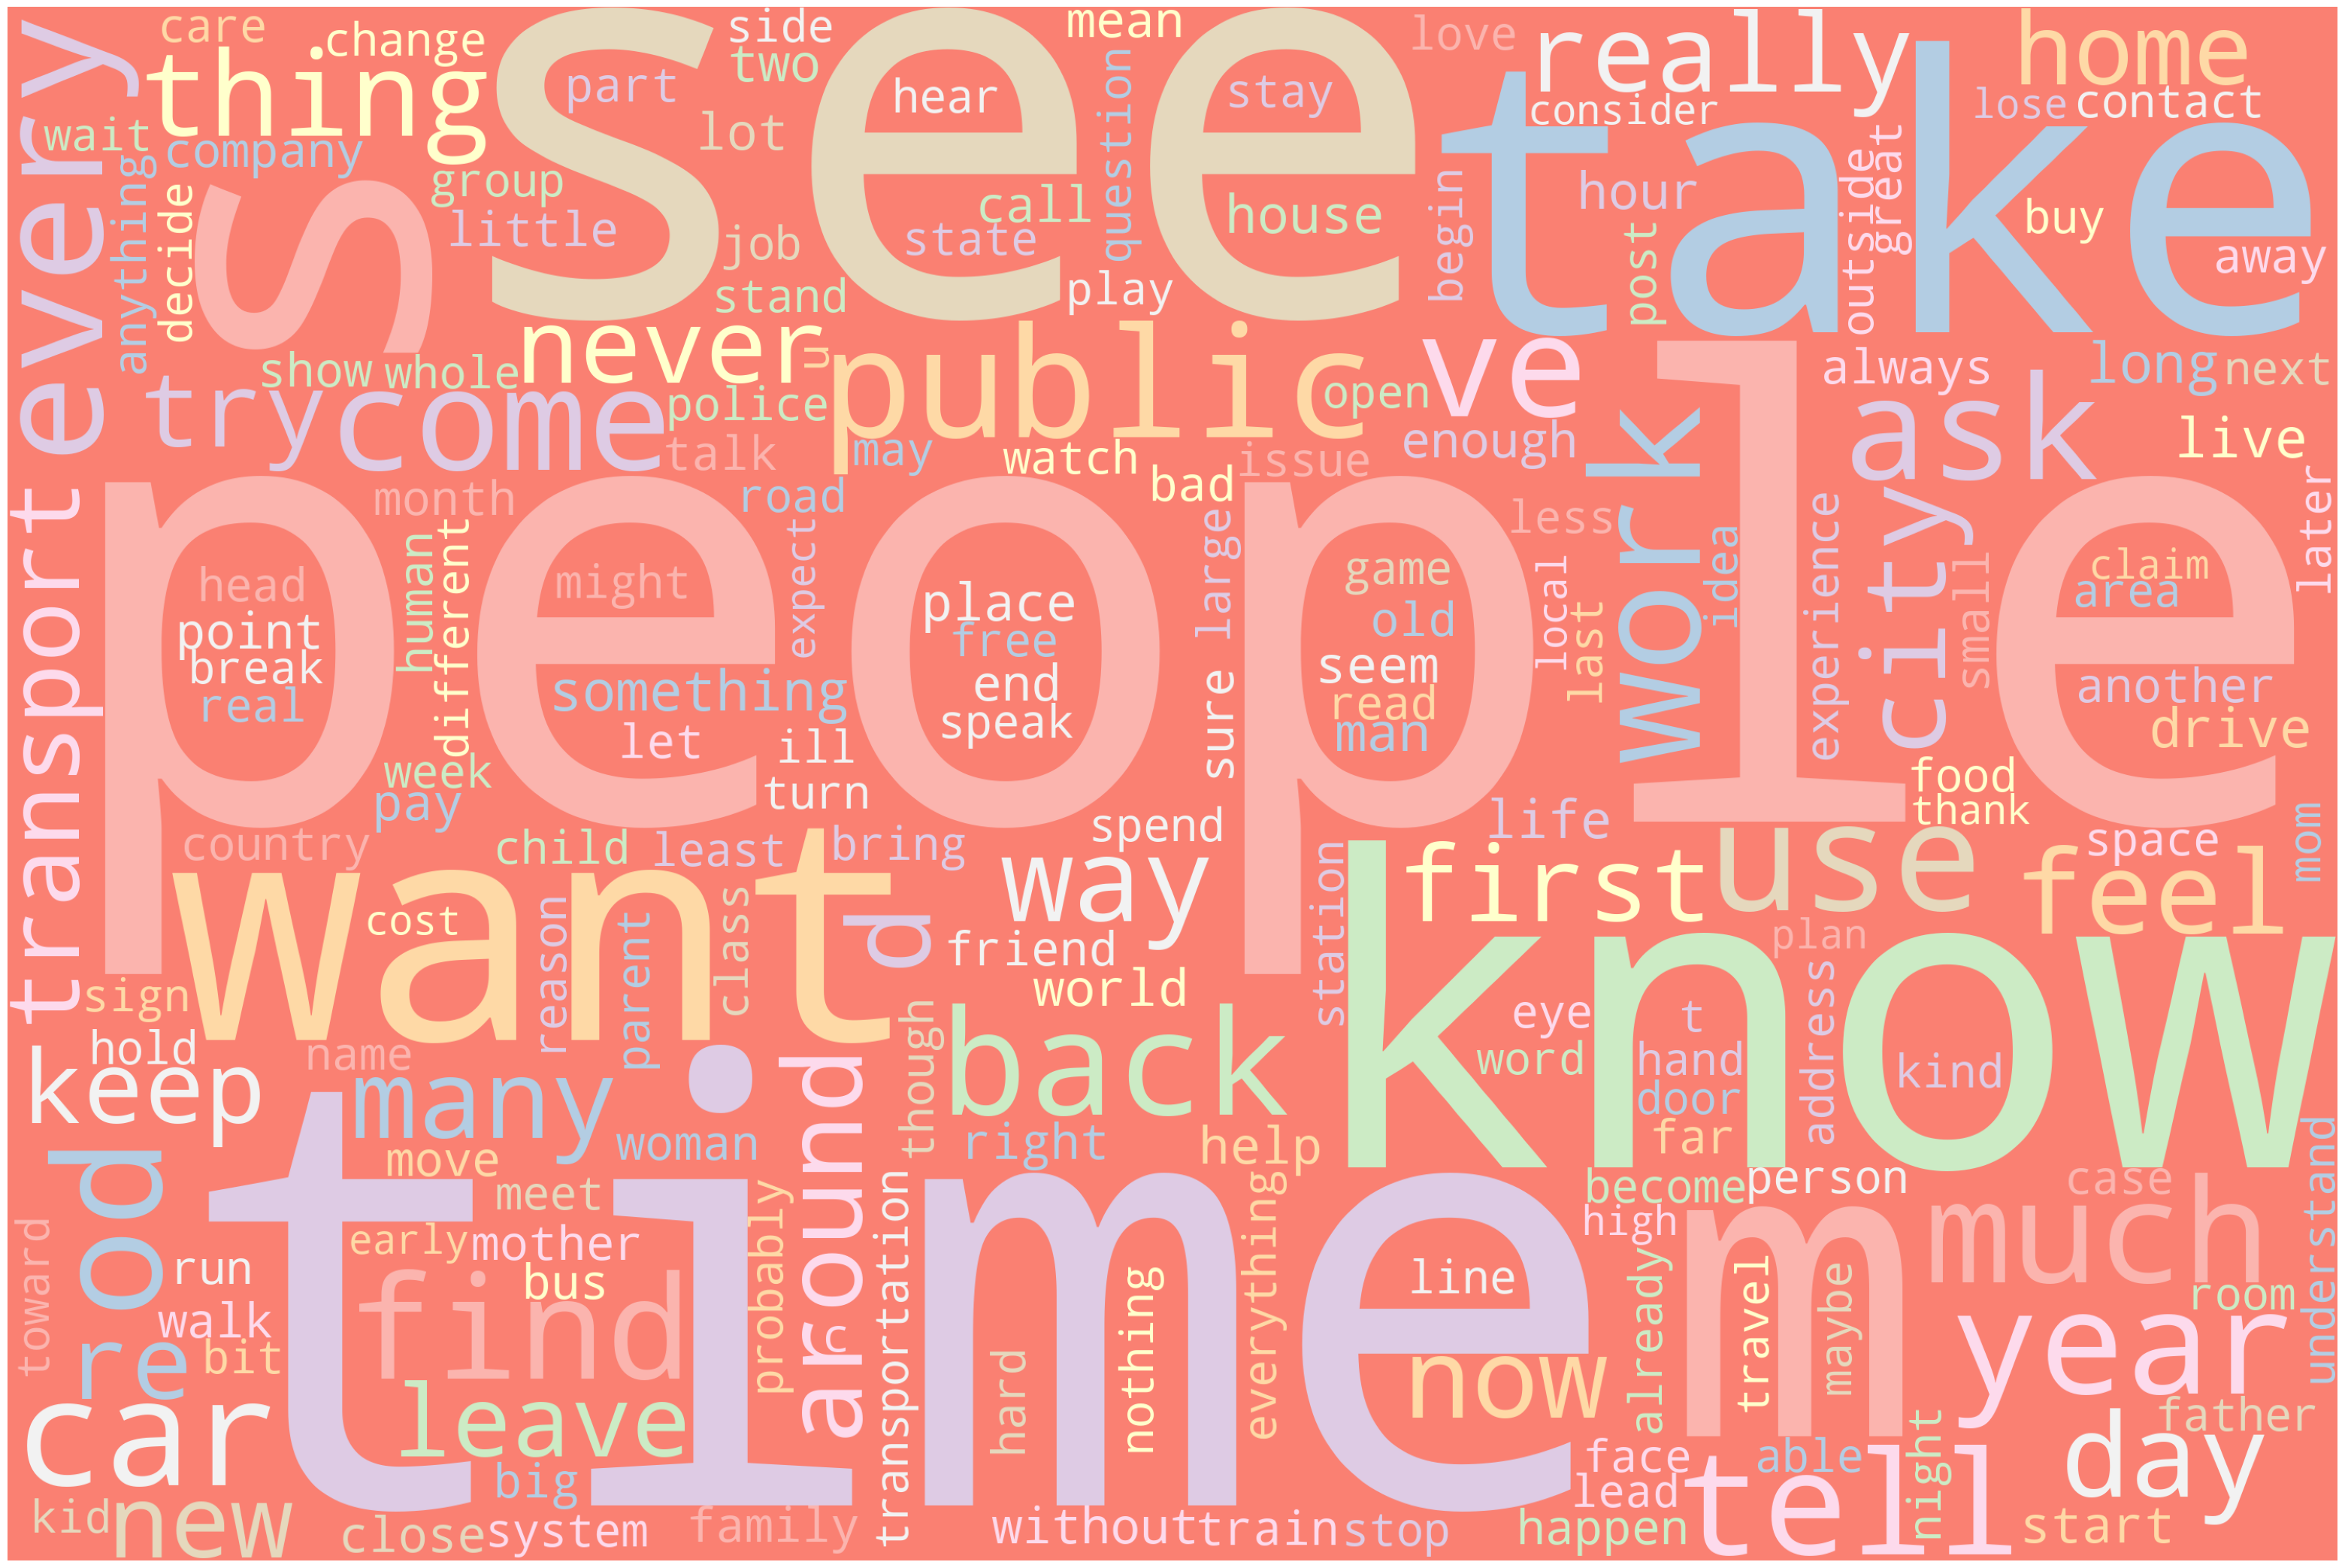

In [7]:
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt

    def plot_cloud(wordcloud):
        plt.figure(figsize=(40, 30))
        plt.imshow(wordcloud) 
        plt.axis("off");

    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

worldcloud_text = " ".join(texts)

words_to_remove = ["one", "go", "even", "give", "will", "need", "say", "well", "still", "make", "think", "look", "etc", "actually", "yet", "put"]

for word in words_to_remove:
    wordcloud_text = wordcloud_text.replace(word, "")



generate_word_cloud(wordcloud_text)

From this world cloud, we can see what topics are the most talked about by people regarding public transportation. This can help us see what matters to them the most and focus on these topics.